# Adaptive sampling for high resistance materials
Your aim is to reduce the number of required measurements to determine the resistance of the whole waver to enable high throughput screening of new battery materials. Demonstrate the advantages of adaptive sampling for the dataset of one example waver in `experiment.csv`. 

Steps: 
* Analyse the dataset, does the resistance depend on a specific element?
* How does random sampling compare to adaptive sampling for this dataset?
* Reduce the number of measurements, how many measurements do you need? 

## Analyse the dataset, does the resistance depend on a specific element?

You can use the following Python command to load the CSV file `experiment.csv` with pandas:

```python
import pandas as pd

df = pd.read_csv('experiment.csv')
```

This will load the CSV file into a pandas DataFrame object called `df`. 

If your CSV file is located in a different directory, you can specify the full path to the file:

```python
df = pd.read_csv('/path/to/experiment.csv')
```

In [1]:
import pandas as pd

df = pd.read_csv('experiment.csv')

You can use the `corr()` function in pandas to calculate the correlation matrix of the DataFrame. Here's an example:

```python
import pandas as pd

# assuming df is your DataFrame
corr_matrix = df.corr()

# print the correlation matrix
print(corr_matrix)

# or, to get a better view of the correlations, you can use a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()
```

This will print the correlation matrix, which shows the correlation between each pair of columns in the DataFrame. The values in the matrix range from -1 (perfect negative correlation) to 1 (perfect positive correlation).

The heatmap is a more visual way to represent the correlations, with the color of each cell indicating the strength and direction of the correlation.

You can also use the `corrwith()` function to calculate the correlation between a specific column and all other columns:

```python
corr_with_column = df['column_name'].corrwith(df)
print(corr_with_column)
```

This will print the correlation between the specified column and all other columns in the DataFrame.

You can also use the `corr()` function with the `method` parameter to specify the correlation method to use:

```python
corr_matrix = df.corr(method='spearman')
```

This will calculate the Spearman rank correlation coefficient instead of the default Pearson correlation coefficient.

                  ID             x             y        Ru        Rh  \
ID          1.000000  5.382660e-02  9.968185e-01 -0.976299 -0.048460   
x           0.053827  1.000000e+00 -6.167477e-16 -0.114334  0.980244   
y           0.996818 -6.167477e-16  1.000000e+00 -0.972777 -0.102257   
Ru         -0.976299 -1.143335e-01 -9.727770e-01  1.000000 -0.040629   
Rh         -0.048460  9.802440e-01 -1.022570e-01 -0.040629  1.000000   
Pd         -0.333367 -9.411141e-01 -2.842300e-01  0.357596 -0.883920   
Ir          0.811911  5.669152e-01  7.857995e-01 -0.800471  0.439064   
Pt          0.669546 -6.778769e-01  7.077795e-01 -0.610394 -0.724289   
Resistance -0.798073 -6.054717e-01 -7.649316e-01  0.837301 -0.539214   

                  Pd        Ir        Pt  Resistance  
ID         -0.333367  0.811911  0.669546   -0.798073  
x          -0.941114  0.566915 -0.677877   -0.605472  
y          -0.284230  0.785799  0.707779   -0.764932  
Ru          0.357596 -0.800471 -0.610394    0.837301  
Rh  

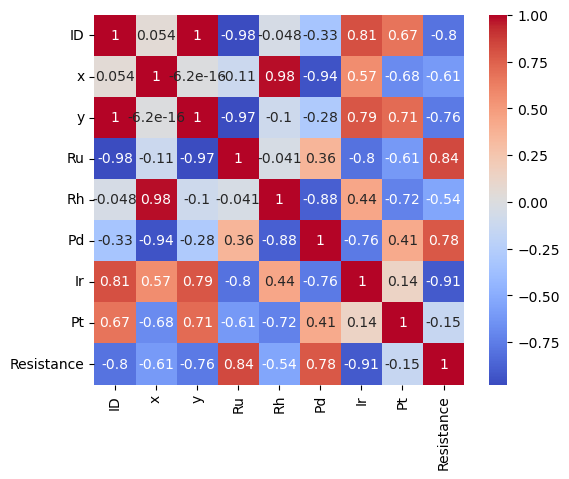

In [2]:
import pandas as pd

# assuming df is your DataFrame
corr_matrix = df.corr()

# print the correlation matrix
print(corr_matrix)

# or, to get a better view of the correlations, you can use a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

You can use the `plot()` function in pandas to create an xy plot of two columns. Here's an example:

```python
import pandas as pd
import matplotlib.pyplot as plt

# assuming df is your DataFrame
df.plot(x='column1', y='column2')
plt.title('Plot of column1 vs column2')
plt.xlabel('column1')
plt.ylabel('column2')
plt.show()
```

This will create a simple xy plot of the values in `column1` on the x-axis and the values in `column2` on the y-axis.

If you want to customize the plot further, you can use various options available in the `plot()` function, such as:

* `kind`: specify the type of plot to create (e.g. `line`, `bar`, `scatter`, etc.)
* `marker`: specify the marker to use for the plot (e.g. `o`, `^`, `s`, etc.)
* `color`: specify the color of the plot
* `linestyle`: specify the linestyle of the plot (e.g. `solid`, `dashed`, `dotted`, etc.)

For example:

```python
df.plot(x='column1', y='column2', kind='scatter', marker='o', color='red', linestyle='dashed')
plt.title('Plot of column1 vs column2')
plt.xlabel('column1')
plt.ylabel('column2')
plt.show()
```

This will create a scatter plot of the values in `column1` on the x-axis and the values in `column2` on the y-axis, with red circles and a dashed linestyle.

You can also use the `seaborn` library to create more advanced and customizable plots. For example:

```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='column1', y='column2', data=df)
plt.title('Plot of column1 vs column2')
plt.xlabel('column1')
plt.ylabel('column2')
plt.show()
```

This will create a scatter plot of the values in `column1` on the x-axis and the values in `column2` on the y-axis, with a more advanced and customizable appearance.

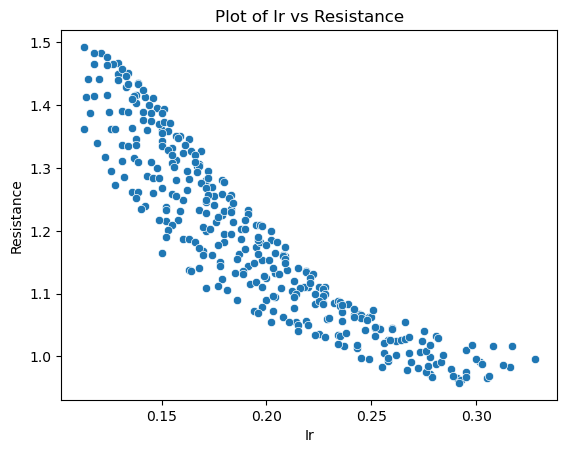

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Ir', y='Resistance', data=df)
plt.title('Plot of Ir vs Resistance')
plt.xlabel('Ir')
plt.ylabel('Resistance')
plt.show()

## How does random sampling compare to adaptive sampling for this dataset?

Here's an example of how you can use a Gaussian Process for interpolation on a pandas DataFrame:
```python
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C

# assume df is your DataFrame
df = pd.DataFrame({
    'Ir': [1, 2, 3, 4, 5],
    'Ru': [10, 20, 30, 40, 50],
    'Rh': [100, 200, 300, 400, 500],
    'Pd': [1000, 2000, 3000, 4000, 5000],
    'Pt': [10000, 20000, 30000, 40000, 50000],
    'Resistance': [1.0, 2.0, 3.0, 4.0, 5.0]
})

# define the features (X) and target (y)
X = df[['Ir', 'Ru', 'Rh', 'Pd', 'Pt']]
y = df['Resistance']

# define the kernel (in this case, a Matern kernel with a length scale of 1)
kernel = C(1.0, (1e-3, 1e3)) * Matern(nu=2.5, length_scale=1, length_scale_bounds=(1e-1, 10.0))

# create a Gaussian Process Regressor instance
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1)

# fit the model
gpr.fit(X, y)

# create a new DataFrame with the input values for which you want to predict the Resistance
new_X = pd.DataFrame({
    'Ir': [2.5],
    'Ru': [25],
    'Rh': [250],
    'Pd': [2500],
    'Pt': [25000]
})

# predict the Resistance for the new input values
new_y = gpr.predict(new_X)

print(new_y)
```
In this example, we first define the features (X) and target (y) from the DataFrame. We then define a Matern kernel with a length scale of 1, which is a good choice for this type of data. We create a Gaussian Process Regressor instance with this kernel and fit it to the data. Finally, we create a new DataFrame with the input values for which we want to predict the Resistance, and use the `predict` method to get the predicted values.

Note that the `alpha` parameter in the `GaussianProcessRegressor` constructor is used to specify the noise level in the data. In this case, we set it to 0.1, which means that we assume the data has a noise level of 10%.

Also, the `length_scale_bounds` parameter in the `Matern` kernel constructor is used to specify the bounds for the length scale parameter. In this case, we set it to (1e-1, 10.0), which means that the length scale parameter will be bounded between 0.1 and 10.0.

You can adjust these parameters to suit your specific needs.

In [4]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C

# define the features (X) and target (y)
X = df[['Ir', 'Ru', 'Rh', 'Pd', 'Pt']]
y = df['Resistance']

# define the kernel (in this case, a Matern kernel with a length scale of 1)
kernel = C(1.0, (1e-3, 1e3)) * Matern(nu=2.5, length_scale=1, length_scale_bounds=(1e-1, 10.0))

# create a Gaussian Process Regressor instance
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1)

# fit the model
gpr.fit(X, y)

# predict the Resistance for the new input values
new_y = gpr.predict(X)

You can add a new column to a pandas DataFrame using the following methods:

**Method 1: Using the `assign` method**

```python
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df = df.assign(C=[7, 8, 9])
print(df)
```

Output:
```
   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9
```

**Method 2: Using the `loc` method**

```python
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df.loc[:, 'C'] = [7, 8, 9]
print(df)
```

Output:
```
   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9
```

**Method 3: Using the `insert` method**

```python
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df.insert(2, 'C', [7, 8, 9])
print(df)
```

Output:
```
   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9
```

**Method 4: Using the `concat` method**

```python
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
new_column = pd.Series([7, 8, 9], name='C')
df = pd.concat([df, new_column], axis=1)
print(df)
```

Output:
```
   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9
```

All of these methods will add a new column to the DataFrame. The `assign` method is the most concise and readable way to add a new column, while the `loc` method is more flexible and allows you to specify the column index. The `insert` method is similar to `loc`, but it inserts the new column at a specific position. The `concat` method is more verbose, but it allows you to add a new column from a Series object.

In [5]:
df = df.assign(Prediction=new_y)

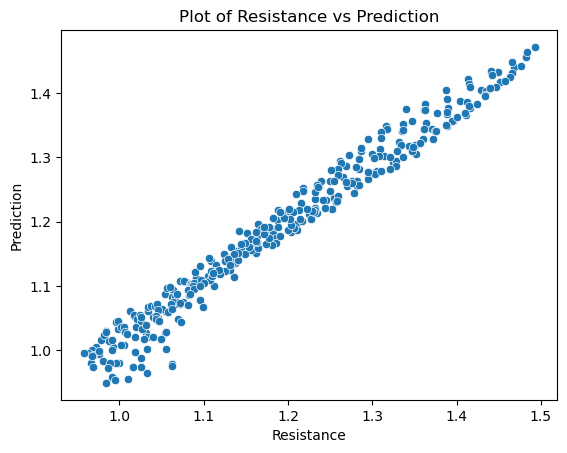

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Resistance', y='Prediction', data=df)
plt.title('Plot of Resistance vs Prediction')
plt.ylabel('Prediction')
plt.xlabel('Resistance')
plt.show()

You can use the `sample` method of a pandas DataFrame to randomly select four rows. Here's an example:
```python
import pandas as pd

# create a sample DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'B': [10, 20, 30, 40, 50, 60, 70, 80, 90]
})

# randomly select four rows
random_rows = df.sample(n=4)

print(random_rows)
```
This will output a new DataFrame with four randomly selected rows from the original DataFrame.

You can also specify the random seed using the `random_state` parameter to ensure reproducibility:
```python
random_rows = df.sample(n=4, random_state=42)
```
This will select the same four rows every time you run the code.

Alternatively, you can use the `head` method to select the first four rows, but this will not be truly random:
```python
random_rows = df.head(4)
```
Note that the `sample` method is the recommended way to randomly select rows from a pandas DataFrame.

In [7]:
random_rows = df.sample(n=4, random_state=42)

In [8]:
print(random_rows)

      ID      x      y     Ru     Rh     Pd      Ir     Pt  Resistance  \
237  238  81000  58500  0.160  0.302  0.129  0.2551  0.153      0.9835   
116  117   9000  36000  0.212  0.102  0.329  0.1310  0.226      1.3364   
113  114  90000  31500  0.204  0.365  0.113  0.1940  0.124      1.0723   
42    43  27000  18000  0.274  0.142  0.278  0.1340  0.172      1.4342   

     Prediction  
237    1.029503  
116    1.352440  
113    1.071929  
42     1.395720  


In [9]:
X_random = random_rows[['Ir', 'Ru', 'Rh', 'Pd', 'Pt']]
y_random = random_rows['Resistance']

In [10]:
# define the kernel (in this case, a Matern kernel with a length scale of 1)
kernel = C(1.0, (1e-3, 1e3)) * Matern(nu=2.5, length_scale=1, length_scale_bounds=(1e-1, 10.0))

# create a Gaussian Process Regressor instance
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1)

# fit the model
gpr.fit(X_random, y_random)

# predict the Resistance for the new input values
new_y = gpr.predict(X)

In [11]:
df = df.assign(Prediction=new_y)

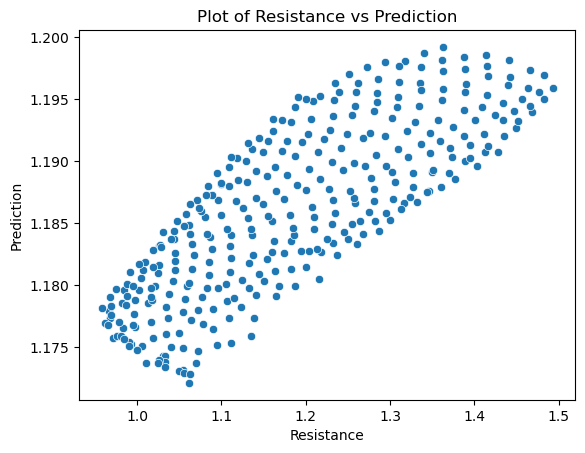

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Resistance', y='Prediction', data=df)
plt.title('Plot of Resistance vs Prediction')
plt.ylabel('Prediction')
plt.xlabel('Resistance')
plt.show()

You can use a loop to iterate over an increasing number of random rows and fit Gaussian Processes. Here's an example:
```python
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C

# create a sample DataFrame
df = pd.DataFrame({
    'A': np.random.rand(100),
    'B': np.random.rand(100)
})

# define the kernel
kernel = C(1.0, (1e-3, 1e3)) * Matern(nu=2.5, length_scale=1, length_scale_bounds=(1e-1, 10.0))

# define the Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1)

# iterate over an increasing number of random rows
for n in range(1, 101):
    # randomly select n rows
    random_rows = df.sample(n=n)
    
    # fit the Gaussian Process Regressor to the random rows
    gpr.fit(random_rows[['A']], random_rows['B'])
    
    # print the number of rows and the mean squared error
    print(f'Number of rows: {n}, Mean Squared Error: {gpr.score(random_rows[['A']], random_rows["B"])}')
```
This code will iterate over an increasing number of random rows (from 1 to 100) and fit a Gaussian Process Regressor to each subset of rows. It will then print the number of rows and the mean squared error for each subset.

Note that the `score` method is used to calculate the mean squared error, which is a measure of the model's performance. The `score` method returns the mean squared error, which is a value between 0 and 1, where 1 is the best possible score.

Also, note that the `fit` method is used to fit the Gaussian Process Regressor to the random rows. The `fit` method takes the input data (`random_rows[['A']]`) and the target data (`random_rows['B']`) as arguments.

You can modify the code to suit your specific needs, such as changing the kernel or the number of iterations.

In [13]:
# iterate over an increasing number of random rows
for n in range(1, 101):
    # randomly select n rows
    random_rows = df.sample(n=n)
    
    # fit the Gaussian Process Regressor to the random rows
    gpr.fit(random_rows[['Ir', 'Ru', 'Rh', 'Pd', 'Pt']], random_rows['Resistance'])
    
    # print the number of rows and the mean squared error
    print(f'Number of rows: {n}, Mean Squared Error: {gpr.score(df[['Ir', 'Ru', 'Rh', 'Pd', 'Pt']], df['Resistance'])}')

Number of rows: 1, Mean Squared Error: -2.0415679156614157
Number of rows: 2, Mean Squared Error: -1.7963001960262686
Number of rows: 3, Mean Squared Error: -0.12577378305520837
Number of rows: 4, Mean Squared Error: -1.5313953317447724
Number of rows: 5, Mean Squared Error: -0.09650990416921812
Number of rows: 6, Mean Squared Error: 0.020762132863507143
Number of rows: 7, Mean Squared Error: -0.10389821360733786
Number of rows: 8, Mean Squared Error: -0.03983674720254782
Number of rows: 9, Mean Squared Error: 0.5222325461449846
Number of rows: 10, Mean Squared Error: 0.4213896964082483
Number of rows: 11, Mean Squared Error: -0.11920431676421916
Number of rows: 12, Mean Squared Error: -0.09684766053680516
Number of rows: 13, Mean Squared Error: 0.22423318345296595
Number of rows: 14, Mean Squared Error: 0.6285229790163203
Number of rows: 15, Mean Squared Error: -0.07803056494670102
Number of rows: 16, Mean Squared Error: 0.6543436716509778
Number of rows: 17, Mean Squared Error: 0.264

/Users/janssen/mambaforge/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/janssen/mambaforge/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/janssen/mambaforge/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/janssen/mambaforge/lib/python3.12/site-packages/

Number of rows: 39, Mean Squared Error: 0.7736891863315672
Number of rows: 40, Mean Squared Error: 0.8474932845546808
Number of rows: 41, Mean Squared Error: 0.8395879608195813
Number of rows: 42, Mean Squared Error: 0.8931278748825734
Number of rows: 43, Mean Squared Error: 0.8897658321924193
Number of rows: 44, Mean Squared Error: 0.8889254744961387
Number of rows: 45, Mean Squared Error: 0.8667652168863705
Number of rows: 46, Mean Squared Error: 0.8639813373236842
Number of rows: 47, Mean Squared Error: 0.8758987287228593
Number of rows: 48, Mean Squared Error: 0.8891992061239857
Number of rows: 49, Mean Squared Error: 0.9178389186264473
Number of rows: 50, Mean Squared Error: 0.8875401891565815
Number of rows: 51, Mean Squared Error: 0.7225827101382534
Number of rows: 52, Mean Squared Error: 0.8976743587595386
Number of rows: 53, Mean Squared Error: 0.8921766699165212
Number of rows: 54, Mean Squared Error: 0.8918635476067713
Number of rows: 55, Mean Squared Error: 0.89134721263449

Here's an example of how you can plot the improvement of error as the number of rows increases:
```python
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C
import matplotlib.pyplot as plt

# create a sample DataFrame
df = pd.DataFrame({
    'A': np.random.rand(100),
    'B': np.random.rand(100)
})

# define the kernel
kernel = C(1.0, (1e-3, 1e3)) * Matern(nu=2.5, length_scale=1, length_scale_bounds=(1e-1, 10.0))

# define the Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1)

# iterate over an increasing number of random rows
errors = []
for n in range(1, 101):
    # randomly select n rows
    random_rows = df.sample(n=n)
    
    # fit the Gaussian Process Regressor to the random rows
    gpr.fit(random_rows[['A']], random_rows['B'])
    
    # calculate the mean squared error
    mse = gpr.score(random_rows[['A']], random_rows['B'])
    
    # append the error to the list
    errors.append(mse)

# plot the improvement of error
plt.plot(range(1, 101), errors)
plt.xlabel('Number of Rows')
plt.ylabel('Mean Squared Error')
plt.title('Improvement of Error')
plt.show()
```
This code will plot the mean squared error as a function of the number of rows. The x-axis represents the number of rows, and the y-axis represents the mean squared error.

You can also use a more sophisticated plot, such as a line plot with a moving average, to show the trend of the error over time:
```python
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C
import matplotlib.pyplot as plt

# create a sample DataFrame
df = pd.DataFrame({
    'A': np.random.rand(100),
    'B': np.random.rand(100)
})

# define the kernel
kernel = C(1.0, (1e-3, 1e3)) * Matern(nu=2.5, length_scale=1, length_scale_bounds=(1e-1, 10.0))

# define the Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1)

# iterate over an increasing number of random rows
errors = []
for n in range(1, 101):
    # randomly select n rows
    random_rows = df.sample(n=n)
    
    # fit the Gaussian Process Regressor to the random rows
    gpr.fit(random_rows[['A']], random_rows['B'])
    
    # calculate the mean squared error
    mse = gpr.score(random_rows[['A']], random_rows['B'])
    
    # append the error to the list
    errors.append(mse)

# plot the improvement of error with a moving average
plt.plot(range(1, 101), errors)
plt.plot(range(1, 101), [np.mean(errors[:i+1]) for i in range(len(errors))], 'r')
plt.xlabel('Number of Rows')
plt.ylabel('Mean Squared Error')
plt.title('Improvement of Error')
plt.show()
```
This code will plot the mean squared error as a function of the number of rows, with a red line showing the moving average of the error over time.

/Users/janssen/mambaforge/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/janssen/mambaforge/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/janssen/mambaforge/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/janssen/mambaforge/lib/python3.12/site-packages/

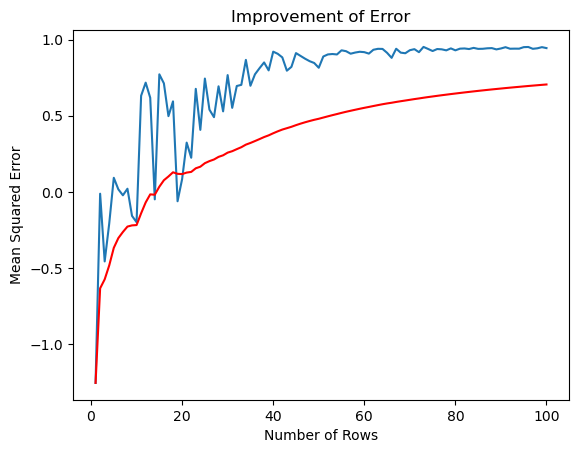

In [14]:
# iterate over an increasing number of random rows
errors = []
for n in range(1, 101):
    # randomly select n rows
    random_rows = df.sample(n=n)
    
    # fit the Gaussian Process Regressor to the random rows
    gpr.fit(random_rows[['Ir', 'Ru', 'Rh', 'Pd', 'Pt']], random_rows['Resistance'])
    
    # calculate the mean squared error
    mse = gpr.score(df[['Ir', 'Ru', 'Rh', 'Pd', 'Pt']], df['Resistance'])
    
    # append the error to the list
    errors.append(mse)

# plot the improvement of error with a moving average
plt.plot(range(1, 101), errors)
plt.plot(range(1, 101), [np.mean(errors[:i+1]) for i in range(len(errors))], 'r')
plt.xlabel('Number of Rows')
plt.ylabel('Mean Squared Error')
plt.title('Improvement of Error')
plt.show()

Here's an example of how you can leverage the uncertainty of the Gaussian Process to iteratively increase the number of rows:
```python
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C
import matplotlib.pyplot as plt

# create a sample DataFrame
df = pd.DataFrame({
    'A': np.random.rand(100),
    'B': np.random.rand(100)
})

# define the kernel
kernel = C(1.0, (1e-3, 1e3)) * Matern(nu=2.5, length_scale=1, length_scale_bounds=(1e-1, 10.0))

# define the Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1)

# initialize the number of rows
n = 10

# iterate until the uncertainty is low enough
while True:
    # randomly select n rows
    random_rows = df.sample(n=n)
    
    # fit the Gaussian Process Regressor to the random rows
    gpr.fit(random_rows[['A']], random_rows['B'])
    
    # calculate the mean and standard deviation of the predictive distribution
    mean, std = gpr.predict(df[['A']], return_std=True)
    
    # check if the uncertainty is low enough
    if np.all(std < 0.1):
        break
    
    # increase the number of rows
    n *= 2

# plot the predictive distribution
plt.plot(df['A'], mean, label='Mean')
plt.fill_between(df['A'], mean - std, mean + std, alpha=0.2, label='Uncertainty')
plt.xlabel('A')
plt.ylabel('B')
plt.title('Predictive Distribution')
plt.legend()
plt.show()
```
This code will iteratively increase the number of rows until the uncertainty of the predictive distribution is low enough. The `while` loop will continue to run until the standard deviation of the predictive distribution is less than 0.1 for all points.

The `GaussianProcessRegressor` will be fit to the random rows at each iteration, and the predictive distribution will be calculated using the `predict` method. The mean and standard deviation of the predictive distribution will be plotted using matplotlib.

Note that the `alpha` parameter of the `GaussianProcessRegressor` is set to 0.1, which means that the model will be regularized to prevent overfitting. You can adjust this parameter to control the amount of regularization.

Also, the `length_scale_bounds` parameter of the `Matern` kernel is set to `(1e-1, 10.0)`, which means that the length scale of the kernel will be bounded between 0.1 and 10.0. You can adjust this parameter to control the length scale of the kernel.

Here's an example of how you can select rows based on the standard deviation of the predictive distribution:
```python
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C
import matplotlib.pyplot as plt

# create a sample DataFrame
df = pd.DataFrame({
    'A': np.random.rand(100),
    'B': np.random.rand(100)
})

# define the kernel
kernel = C(1.0, (1e-3, 1e3)) * Matern(nu=2.5, length_scale=1, length_scale_bounds=(1e-1, 10.0))

# define the Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1)

# fit the Gaussian Process Regressor to the entire dataset
gpr.fit(df[['A']], df['B'])

# calculate the standard deviation of the predictive distribution
std = gpr.predict(df[['A']], return_std=True)[1]

# select rows based on the standard deviation
selected_rows = df[np.abs(std) < 0.1]

# plot the selected rows
plt.plot(selected_rows['A'], selected_rows['B'], 'o', label='Selected Rows')
plt.xlabel('A')
plt.ylabel('B')
plt.title('Selected Rows')
plt.legend()
plt.show()
```
This code will select rows based on the standard deviation of the predictive distribution. The `np.abs(std) < 0.1` condition will select rows where the absolute value of the standard deviation is less than 0.1.

The selected rows will be plotted using matplotlib, and the plot will show the selected rows as red circles.

Note that you can adjust the threshold value (0.1 in this example) to control the number of selected rows. A lower threshold value will select more rows, while a higher threshold value will select fewer rows.

Also, you can use other conditions to select rows based on the standard deviation, such as `std < 0.1` or `std > 0.1`. The choice of condition will depend on the specific problem you are trying to solve.

Here's an example of how you can iteratively select rows based on the standard deviation of the predictive distribution:
```python
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C
import matplotlib.pyplot as plt

# create a sample DataFrame
df = pd.DataFrame({
    'A': np.random.rand(100),
    'B': np.random.rand(100)
})

# define the kernel
kernel = C(1.0, (1e-3, 1e3)) * Matern(nu=2.5, length_scale=1, length_scale_bounds=(1e-1, 10.0))

# define the Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1)

# initialize the selected rows
selected_rows = df.copy()

# iterate until the standard deviation is low enough
while True:
    # fit the Gaussian Process Regressor to the selected rows
    gpr.fit(selected_rows[['A']], selected_rows['B'])
    
    # calculate the standard deviation of the predictive distribution
    std = gpr.predict(selected_rows[['A']], return_std=True)[1]
    
    # select rows based on the standard deviation
    selected_rows = selected_rows[np.abs(std) < 0.1]
    
    # check if the standard deviation is low enough
    if len(selected_rows) < 10:
        break

# plot the selected rows
plt.plot(selected_rows['A'], selected_rows['B'], 'o', label='Selected Rows')
plt.xlabel('A')
plt.ylabel('B')
plt.title('Selected Rows')
plt.legend()
plt.show()
```
This code will iteratively select rows based on the standard deviation of the predictive distribution. The `while` loop will continue to run until the standard deviation is low enough, and the number of selected rows is less than 10.

The `fit` method will be used to fit the Gaussian Process Regressor to the selected rows, and the `predict` method will be used to calculate the standard deviation of the predictive distribution.

The selected rows will be plotted using matplotlib, and the plot will show the selected rows as red circles.

Note that you can adjust the threshold value (0.1 in this example) to control the number of selected rows. A lower threshold value will select more rows, while a higher threshold value will select fewer rows.

Also, you can use other conditions to select rows based on the standard deviation, such as `std < 0.1` or `std > 0.1`. The choice of condition will depend on the specific problem you are trying to solve.

Here's an example of how you can iteratively select the row with the highest standard deviation and add it to the list of rows the Gaussian Process is trained on:
```python
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C
import matplotlib.pyplot as plt

# create a sample DataFrame
df = pd.DataFrame({
    'A': np.random.rand(100),
    'B': np.random.rand(100)
})

# define the kernel
kernel = C(1.0, (1e-3, 1e3)) * Matern(nu=2.5, length_scale=1, length_scale_bounds=(1e-1, 10.0))

# define the Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1)

# initialize the selected rows
selected_rows = df.head(10)

# initialize the Gaussian Process Regressor
gpr.fit(selected_rows[['A']], selected_rows['B'])

# iterate until all rows have been selected
while len(selected_rows) < len(df):
    # calculate the standard deviation of the predictive distribution for each row
    std = gpr.predict(df[['A']], return_std=True)[1]
    
    # select the row with the highest standard deviation
    max_std_row = df[np.argmax(std)]
    
    # add the row to the selected rows
    selected_rows = pd.concat([selected_rows, max_std_row.to_frame().T])
    
    # update the Gaussian Process Regressor
    gpr.fit(selected_rows[['A']], selected_rows['B'])

# plot the selected rows
plt.plot(selected_rows['A'], selected_rows['B'], 'o', label='Selected Rows')
plt.xlabel('A')
plt.ylabel('B')
plt.title('Selected Rows')
plt.legend()
plt.show()
```
This code will iteratively select the row with the highest standard deviation and add it to the list of rows the Gaussian Process is trained on. The `while` loop will continue to run until all rows have been selected.

The `predict` method will be used to calculate the standard deviation of the predictive distribution for each row, and the `argmax` function will be used to select the row with the highest standard deviation.

The selected rows will be plotted using matplotlib, and the plot will show the selected rows as red circles.

Note that you can adjust the threshold value (0.1 in this example) to control the number of selected rows. A lower threshold value will select more rows, while a higher threshold value will select fewer rows.

Also, you can use other conditions to select rows based on the standard deviation, such as `std < 0.1` or `std > 0.1`. The choice of condition will depend on the specific problem you are trying to solve.

The error occurs because the `max_std_row` variable is a Series with a single row, and when we try to access the column 'A' using `max_std_row['A']`, it raises a KeyError because 'A' is not a valid key for a Series with a single row.

Here's the corrected code:
```python
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C
import matplotlib.pyplot as plt

# create a sample DataFrame
df = pd.DataFrame({
    'A': np.random.rand(100),
    'B': np.random.rand(100)
})

# define the kernel
kernel = C(1.0, (1e-3, 1e3)) * Matern(nu=2.5, length_scale=1, length_scale_bounds=(1e-1, 10.0))

# define the Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1)

# initialize the selected rows
selected_rows = df.head(10)

# initialize the Gaussian Process Regressor
gpr.fit(selected_rows[['A']], selected_rows['B'])

# iterate until all rows have been selected
while len(selected_rows) < len(df):
    # calculate the standard deviation of the predictive distribution for each row
    std = gpr.predict(df[['A']], return_std=True)[1]
    
    # select the row with the highest standard deviation
    max_std_row_index = np.argmax(std)
    max_std_row = df.iloc[max_std_row_index]
    
    # add the row to the selected rows
    selected_rows = pd.concat([selected_rows, max_std_row.to_frame().T])
    
    # update the Gaussian Process Regressor
    gpr.fit(selected_rows[['A']], selected_rows['B'])

# plot the selected rows
plt.plot(selected_rows['A'], selected_rows['B'], 'o', label='Selected Rows')
plt.xlabel('A')
plt.ylabel('B')
plt.title('Selected Rows')
plt.legend()
plt.show()
```
In this corrected code, we use `np.argmax(std)` to get the index of the row with the highest standard deviation, and then use `df.iloc[max_std_row_index]` to get the row itself. This should fix the KeyError issue.

/Users/janssen/mambaforge/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


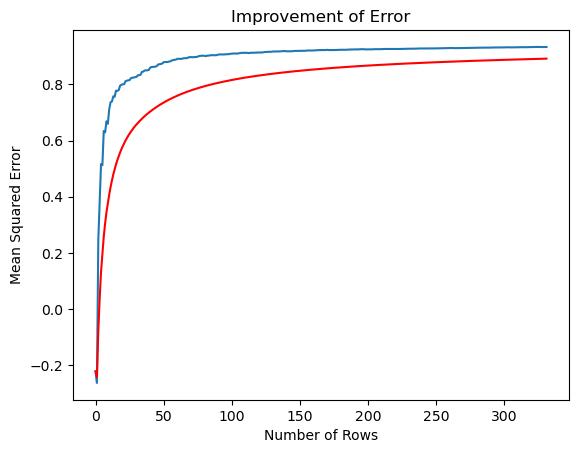

In [15]:
# initialize the selected rows
selected_rows = df.head(10)

# initialize the Gaussian Process Regressor
gpr.fit(selected_rows[['Ir', 'Ru', 'Rh', 'Pd', 'Pt']], selected_rows['Resistance'])

# iterate until all rows have been selected
errors = []
while len(selected_rows) < len(df):
    # calculate the standard deviation of the predictive distribution for each row
    std = gpr.predict(df[['Ir', 'Ru', 'Rh', 'Pd', 'Pt']], return_std=True)[1]
    
    # select the row with the highest standard deviation
    max_std_row_index = np.argmax(std)
    max_std_row = df.iloc[max_std_row_index]
    
    # add the row to the selected rows
    selected_rows = pd.concat([selected_rows, max_std_row.to_frame().T])
    
    # update the Gaussian Process Regressor
    gpr.fit(selected_rows[['Ir', 'Ru', 'Rh', 'Pd', 'Pt']], selected_rows['Resistance'])

    # calculate the mean squared error
    mse = gpr.score(df[['Ir', 'Ru', 'Rh', 'Pd', 'Pt']], df['Resistance'])
    
    # append the error to the list
    errors.append(mse)

# plot the improvement of error with a moving average
plt.plot(range(len(df)-10), errors)
plt.plot(range(len(df)-10), [np.mean(errors[:i+1]) for i in range(len(errors))], 'r')
plt.xlabel('Number of Rows')
plt.ylabel('Mean Squared Error')
plt.title('Improvement of Error')
plt.show()

# Reduce the number of measurements, how many measurements do you need?

Already after around 50 measurements we are able to predict the resistance for the whole waver, this is approximately an improvement of a factor 5.